In [17]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
from icecream import ic
import augmentationsk
#import seaborn as sns
#sns.set(color_codes=True)
data_dir= 'Dataset Preview/Inv3D preview complete V2/data/train/'

In [31]:
def tight_crop_all(im, fm, bm):
    img_size = (256,256)
    
    msk=((fm[:,:,0]!=0)&(fm[:,:,1]!=0)&(fm[:,:,2]!=0)).astype(np.uint8)
    size=msk.shape
    [y, x] = (msk).nonzero()
 
    minx = min(x)
    maxx = max(x)
    miny = min(y)
    maxy = max(y)
    im = im[miny : maxy + 1, minx : maxx + 1, :]
    fm = fm[miny : maxy + 1, minx : maxx + 1, :]


    t=miny
    b=size[0]-maxy
    l=minx
    r=size[1]-maxx

    bm = np.array(bm, dtype=np.float64)

    bm = bm*255
    bm[:,:,1]=bm[:,:,1]-t
    bm[:,:,0]=bm[:,:,0]-l
    ic(bm.shape)
    bm=bm/np.array([256.0-l-r, 256.0-t-b])

    bm = torch.from_numpy(bm).float()

    img = cv2.resize(im.numpy(), (256,256), interpolation=cv2.INTER_NEAREST)

    #img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).float()
    #img = img / 255

    return img, fm, bm

In [33]:
path = data_dir + '00'

#img = utils.load_warped_document_chw(path)
#img = img.transpose(0,1).transpose(1,2)
img = cv2.imread(path + '/warped_document.png')
img = torch.from_numpy(img).float()
wc = np.load(path + '/warped_WC.npz')['warped_WC']
bm = np.load(path + '/warped_BM.npz')['warped_BM']
#ic(wc.shape)
#ic(bm.shape)
#wc, bm = utils.tight_crop_wc_bm(wc, bm)
ic(img.shape)
ic(img.max())
img, wc, bm = tight_crop_all(img, wc, bm)
#img, wc, bm = utils.tight_crop_im_bm(img, wc, bm)
#img, bm = utils.tight_crop_no_fm(img.numpy(), bm)
ic(bm.shape)
ic(img.shape)

ic| img.shape: torch.Size([256, 256, 3])
ic| img.max(): tensor(174.)
ic| bm.shape: (256, 256, 2)
ic| bm.shape: torch.Size([256, 256, 2])
ic| img.shape: torch.Size([256, 256, 3])


torch.Size([256, 256, 3])

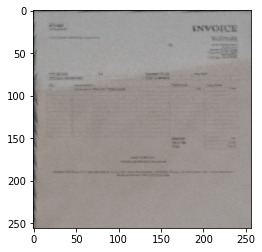

In [36]:
#img = torch.from_numpy(img).transpose(2,1).transpose(1,0).unsqueeze(0)
img = img.transpose(2,1).transpose(1,0).unsqueeze(0)
unwarped_img = utils.unwarp_image_crop(img/255,bm.unsqueeze(0))
plt.imshow(unwarped_img)

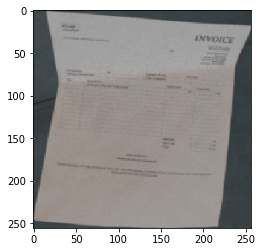

In [35]:
#plt.imshow(img[0].transpose(0,1).transpose(1,2))
plt.imshow(img/255)

In [6]:
ic(img.max())
ic(bm.max())


ic| img.max(): tensor(0.6824)
ic| bm.max(): tensor(inf)


tensor(inf)

In [6]:
#img = torch.from_numpy(img).transpose(2,1).transpose(1,0).unsqueeze(0)
#ic(img.shape)
#img = torch.from_numpy(img).float()
#img = img.unsqueeze(0)
#ic(bm.shape)
"BM shape needs to be (N, H, W, C)"
#n, c, h, w = img.shape

#ic(unwarped_img.shape)

In [4]:
bm.max()

tensor(0.9956)

In [6]:
bm.min()

tensor(-0.0006)

In [37]:
img_size = (256,256)
float(img_size[0])

256.0